# Regression of Used Car Prices

#### Playground Series - Season 4, Episode 9

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### Load Data

In [2]:
train_df = pd.read_csv('/Users/hyunkoolee/google_mlb/kaggle/kaggle_playground-series-s4e9/data/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/Users/hyunkoolee/google_mlb/kaggle/kaggle_playground-series-s4e9/data/playground-series-s4e9/test.csv')

In [3]:
display(train_df.sample(10))
display(test_df.sample(10))


id          brand                           model  model_year  \
180969  180969        Porsche                         Macan S        2021   
84863    84863  Mercedes-Benz         Sprinter 3500 High Roof        2014   
29791    29791           Land  Rover Range Rover Velar P380 S        2020   
4233      4233           Ford                       Fusion SE        2009   
85076    85076            BMW                    528 i xDrive        2023   
186172  186172           Jeep               Gladiator Rubicon        2020   
18273    18273           MINI                   Cooper S Base        2003   
45619    45619           Ford              Mustang GT Premium        2017   
98407    98407          Tesla              Model Y Long Range        2023   
58709    58709          Lexus                LX 570 Three-Row        2020   

        milage fuel_type                                         engine  \
180969   14745  Gasoline                                3.0 Liter Turbo   
84863    80000    Diesel    188.0HP 3.0L V6 Cylinder Engine Diesel Fuel   
29791    22372  Gasoline                                      3.0 Liter   
4233    153000  Gasoline   231.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
85076     6682  Gasoline                4.0L V8 32V GDI DOHC Twin Turbo   
186172   53401  Gasoline  285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
18273    94653  Gasoline   172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
45619    94500  Gasoline   460.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
98407     5844       NaN    425.0HP Electric Motor Electric Fuel System   
58709    27340  Gasoline   383.0HP 5.7L 8 Cylinder Engine Gasoline Fuel   

                          transmission               ext_col int_col  \
180969                       Automatic                 White       –   
84863   Transmission w/Dual Shift Mode                 Green   Black   
29791                        Automatic                 White   Black   
4233                               A/T                  Gray   Black   
85076                8-Speed Automatic  Matador Red Metallic   Black   
186172                             A/T                  Gray   Black   
18273                      6-Speed M/T                   Red   Black   
45619                      6-Speed M/T                 Black   Black   
98407                              A/T                 White   White   
58709   Transmission w/Dual Shift Mode                 Black   Black   

                                      accident clean_title   price  
180969                           None reported         NaN   76598  
84863                            None reported         Yes   16000  
29791                            None reported         NaN   55998  
4233                             None reported         Yes    8500  
85076                            None reported         Yes  164725  
186172                           None reported         Yes   39500  
18273   At least 1 accident or damage reported         Yes   10500  
45619   At least 1 accident or damage reported         Yes   34700  
98407                            None reported         Yes   45999  
58709   At least 1 accident or damage reported         Yes   37500

id     brand                  model  model_year  milage  \
96201   284734      Ford        Transit-350 XLT        2015  120000   
25925   214458      Land  Rover Range Rover HSE        2011   93000   
35148   223681  INFINITI               G35 Base        2009   69001   
86154   274687    Toyota       Tacoma TRD Sport        2021   38671   
98272   286805       BMW      X5 PHEV xDrive45e        2023   15200   
111666  300199      Ford     Mustang GT Premium        2018   26465   
104013  292546   Porsche           Cayenne Base        2004  186000   
75882   264415      Ford              F-150 XLT        2018   87555   
30997   219530      Ford      Shelby GT500 Base        2021    8400   
98381   286914     Acura         TLX V6 Advance        2021   38612   

             fuel_type                                             engine  \
96201         Gasoline      310.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
25925         Gasoline       385.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
35148         Gasoline      280.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
86154         Gasoline                                          3.5 Liter   
98272   Plug-In Hybrid  389.0HP 3.0L Straight 6 Cylinder Engine Plug-I...   
111666        Gasoline       460.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
104013        Gasoline      300.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
75882    E85 Flex Fuel  385.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...   
30997         Gasoline       760.0HP 5.2L 8 Cylinder Engine Gasoline Fuel   
98381         Gasoline                         2.0L I4 16V GDI DOHC Turbo   

                          transmission                ext_col  \
96201                              A/T                 Silver   
25925                              A/T                  Black   
35148   Transmission w/Dual Shift Mode                 Silver   
86154                        Automatic  Lunar Silver Metallic   
98272                      8-Speed A/T                    Red   
111666                    10-Speed A/T                   Blue   
104013                             A/T                    Red   
75882                              A/T                   Gray   
30997   Transmission w/Dual Shift Mode                  Black   
98381               10-Speed Automatic                    Red   

                     int_col                                accident  \
96201                   Gray  At least 1 accident or damage reported   
25925                  Black                           None reported   
35148                  Black                           None reported   
86154   Graphite w/Gun Metal                           None reported   
98272                  Black                           None reported   
111666                 Black                           None reported   
104013                 Beige                           None reported   
75882                  Black                           None reported   
30997                  Black                           None reported   
98381                  Ebony                           None reported   

       clean_title  
96201          Yes  
25925          Yes  
35148          Yes  
86154          NaN  
98272          Yes  
111666         Yes  
104013         Yes  
75882          Yes  
30997          Yes  
98381          Yes

In [4]:
train_df.shape

(188533, 13)

In [5]:
test_df.shape

(125690, 12)

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


In [7]:
print(train_df.describe())

                  id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.387802e+04
std     54424.933488       5.660967   49798.158076  7.881952e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47133.000000    2013.000000   24115.000000  1.700000e+04
50%     94266.000000    2017.000000   57785.000000  3.082500e+04
75%    141399.000000    2020.000000   95400.000000  4.990000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06


In [8]:
print(train_df.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

In [9]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB
None


In [10]:
print(test_df.describe())

                  id     model_year         milage
count  125690.000000  125690.000000  125690.000000
mean   251377.500000    2015.797526   66042.581510
std     36283.722005       5.673797   50223.858435
min    188533.000000    1974.000000     100.000000
25%    219955.250000    2013.000000   24500.000000
50%    251377.500000    2017.000000   57500.000000
75%    282799.750000    2020.000000   95798.000000
max    314222.000000    2024.000000  405000.000000


In [11]:
print(test_df.head())

       id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1   

### 결측치 확인

In [12]:
print(train_df.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [13]:
print(test_df.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


결측치 확인 결과 train data, test data에서 모두 fuel_type, accident, clean_title 컬럼에서 결측치가 있다는 것을 확인할 수 있음

특히 clean_title 컬럼은 결측치 개수가 많은 편임

#### 고유값 개수 및 비율 확인

In [14]:
train_df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [1]:
unique_fuel_types_train = train_df['fuel_type'].unique()
print(unique_fuel_types_train)

NameError: name 'train_df' is not defined

In [249]:
test_df.nunique()

id              125690
brand               55
model             1891
model_year          36
milage            5700
fuel_type            7
engine            1117
transmission        52
ext_col            317
int_col            156
accident             2
clean_title          1
dtype: int64

In [15]:
unique_fuel_types_test = test_df['fuel_type'].unique()
print(unique_fuel_types_test)

['Gasoline' 'Hybrid' 'Diesel' 'E85 Flex Fuel' nan 'Plug-In Hybrid' '–'
 'not supported']


In [18]:
unique_engine_types_train = train_df['engine'].unique()
uinque_engine_types_test = test_df['engine'].unique()

print(unique_engine_types_train)
print(uinque_engine_types_test)

['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas'
 '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas']
['240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid'
 '3.5L V6 24V PDI DOHC Twin Turbo' ...
 '266.0HP 2.5L 4 Cylinder Engine Plug-In Electric/Gas'
 '275.0HP 3.5L V6 Cylinder Engine Flex Fuel Capability'
 '226.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid']


#### 누출 확인

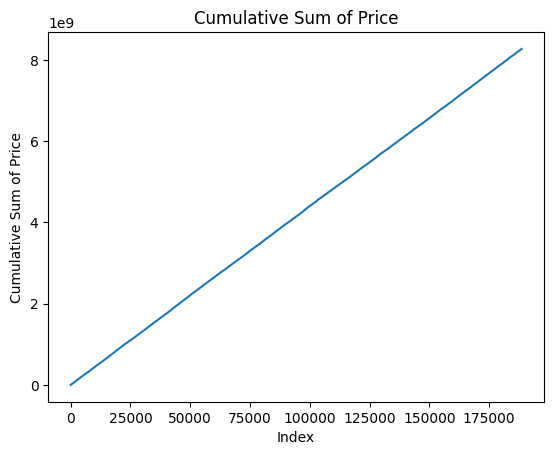

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 복사 및 target 컬럼을 0, 1로 변환
df_train_copy = train_df.copy()

# target의 cumsum 계산 후 시각화
df_train_copy['price'].cumsum().plot()

# 그래프 출력
plt.xlabel('Index')
plt.ylabel('Cumulative Sum of Price')
plt.title('Cumulative Sum of Price')
plt.show()

# train data가 잘 섞여 있는지 분포 확인
# 그래프가 휘어져 보이는 경우 누출이 있는 것

누출 없이 잘 분포되어 있으므로 결측치 확인을 진행하도록 함

### 결측치 확인

In [251]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# Step 2: Check for missing values
missing_values = train_df.isna().sum()
print("Missing values:\n", missing_values)


Numerical columns: Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Categorical columns: Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')
Missing values:
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


### 분포 확인

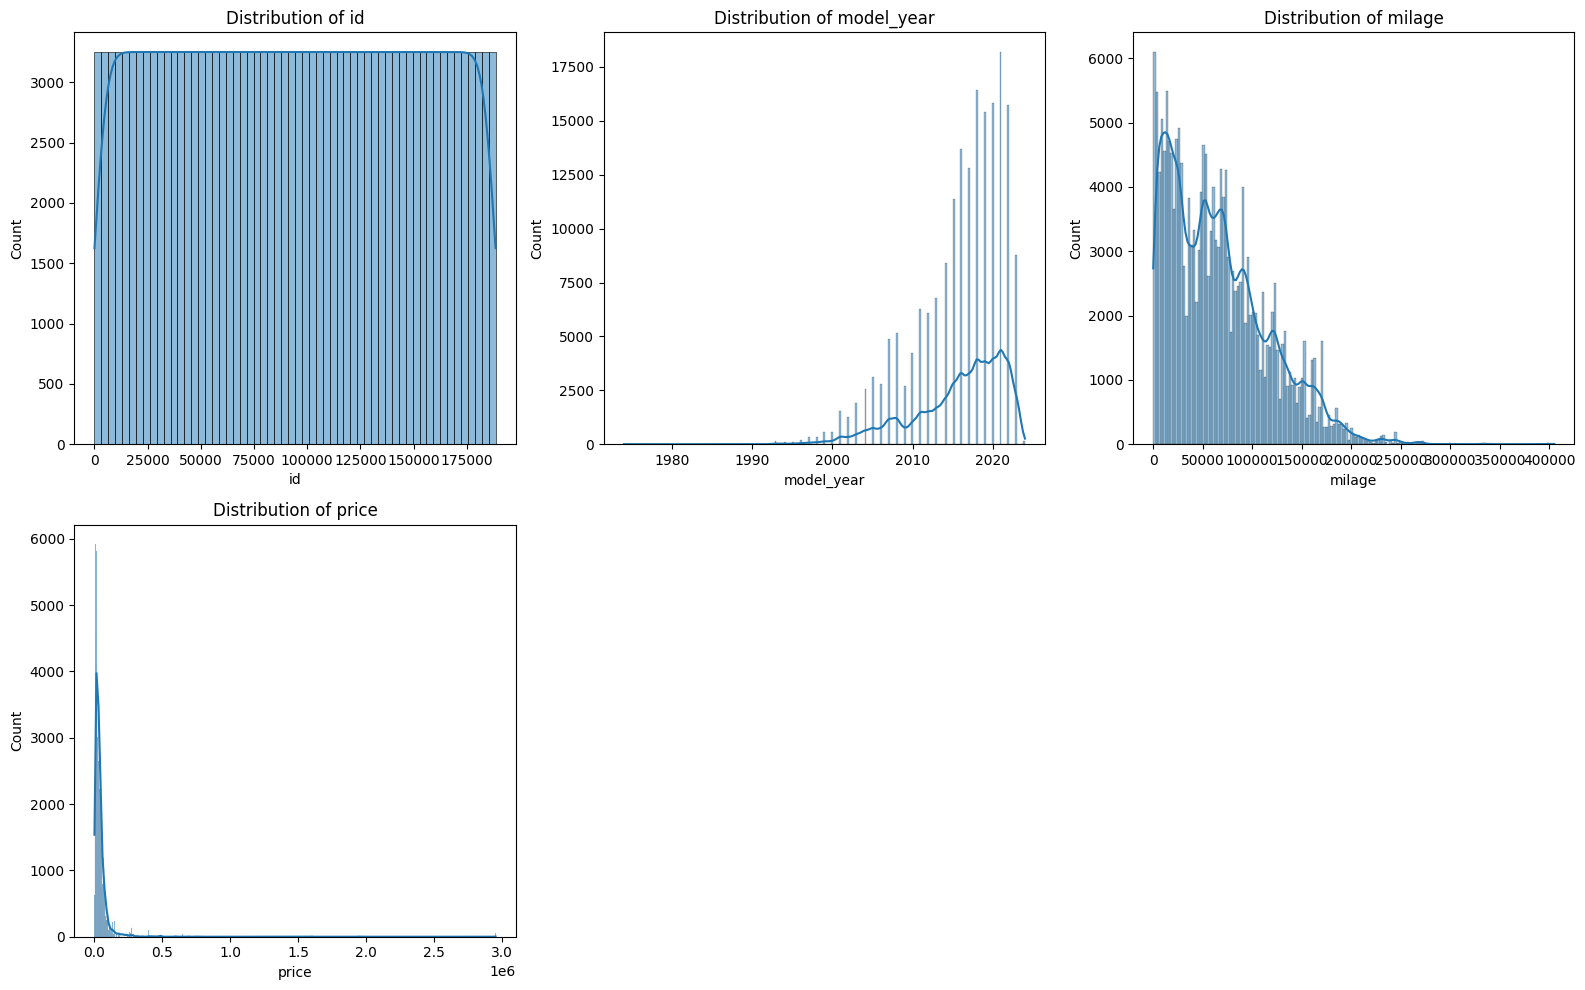

In [252]:
# Step 3: Visualize distributions for numerical variables
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


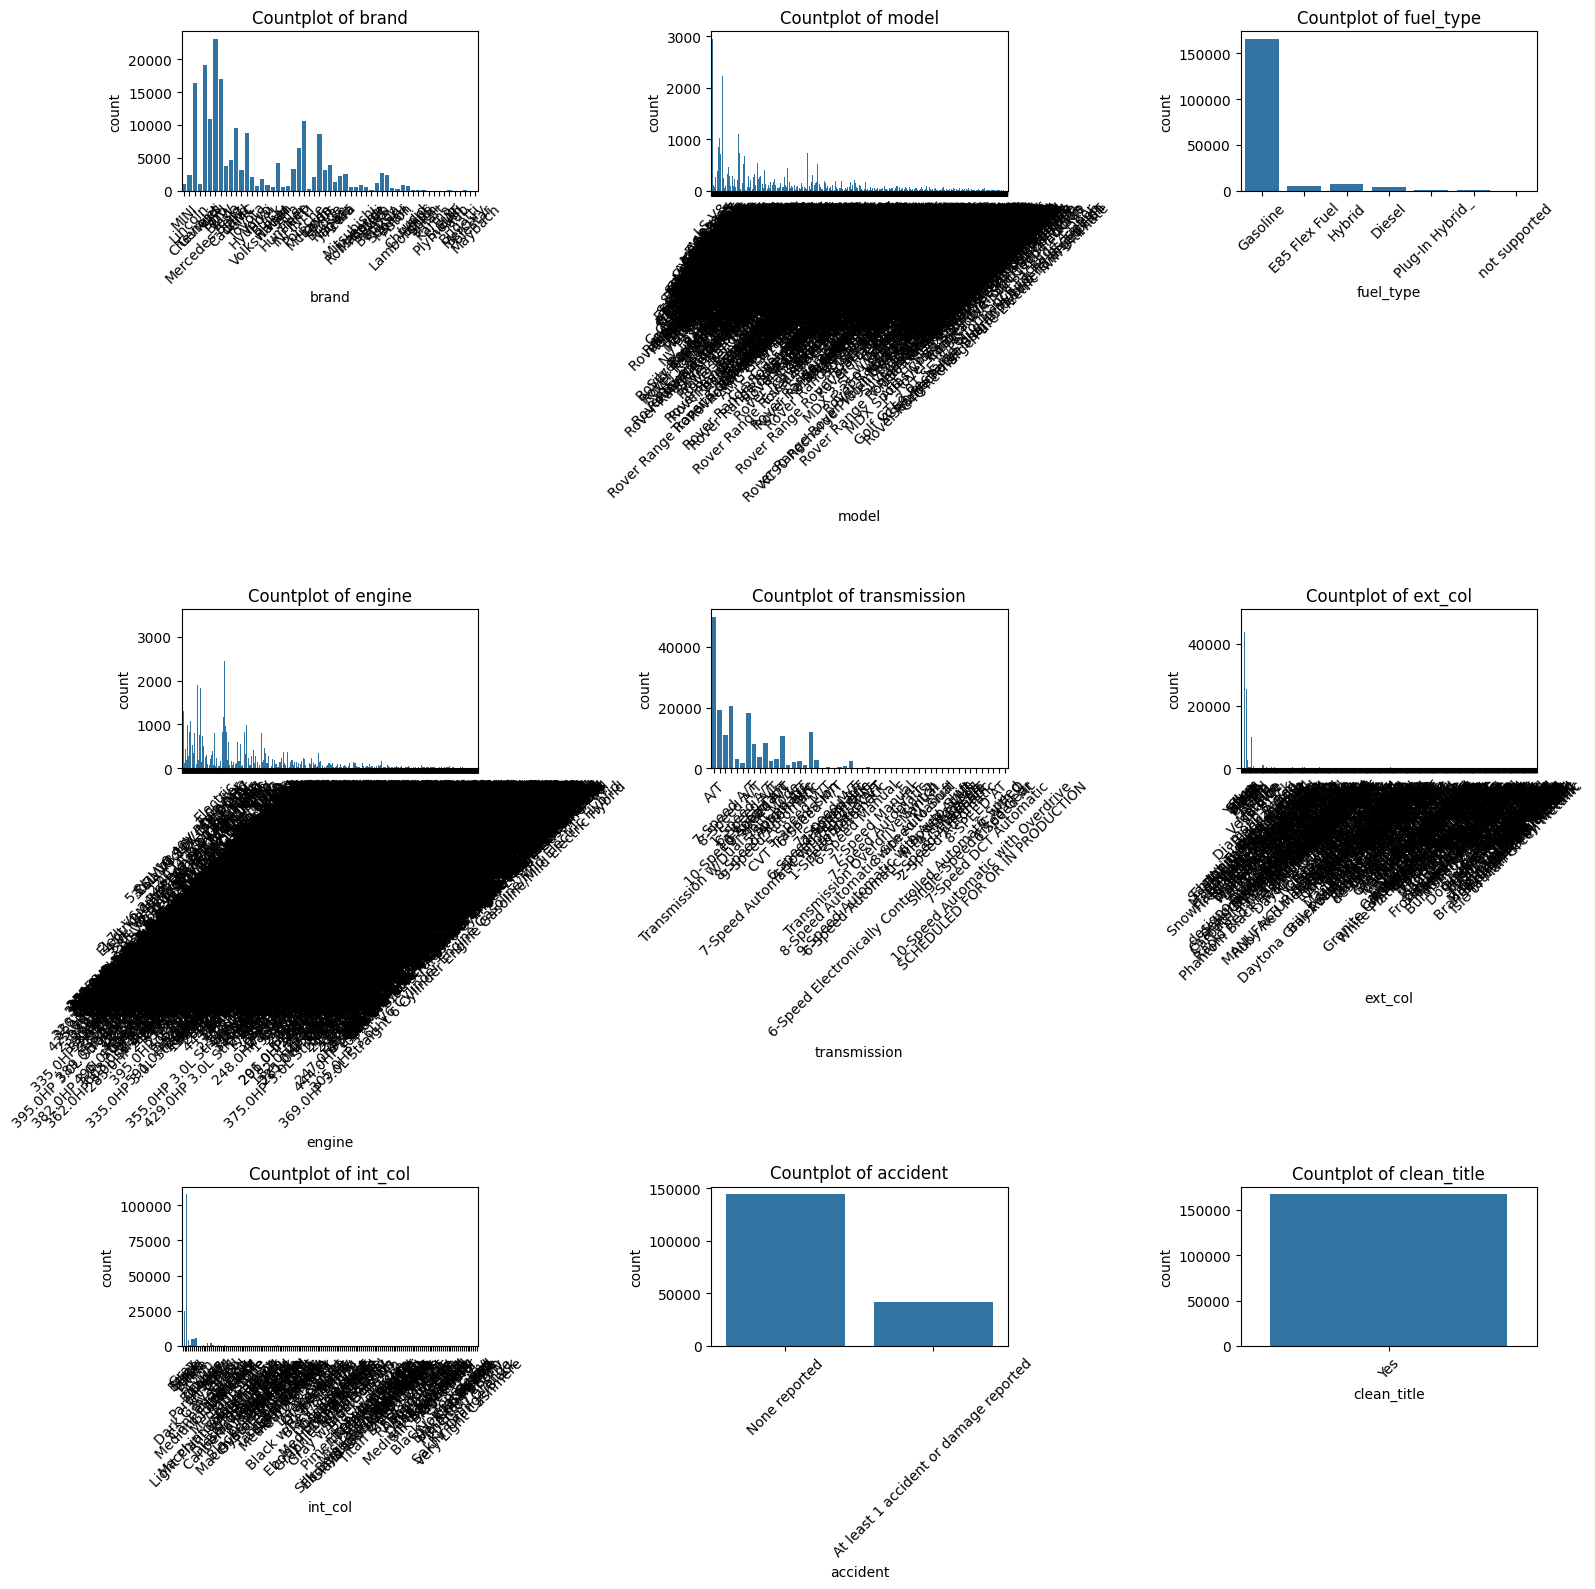

In [253]:
# Step 4: Visualize counts for categorical variables
plt.figure(figsize=(16, 16))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=train_df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


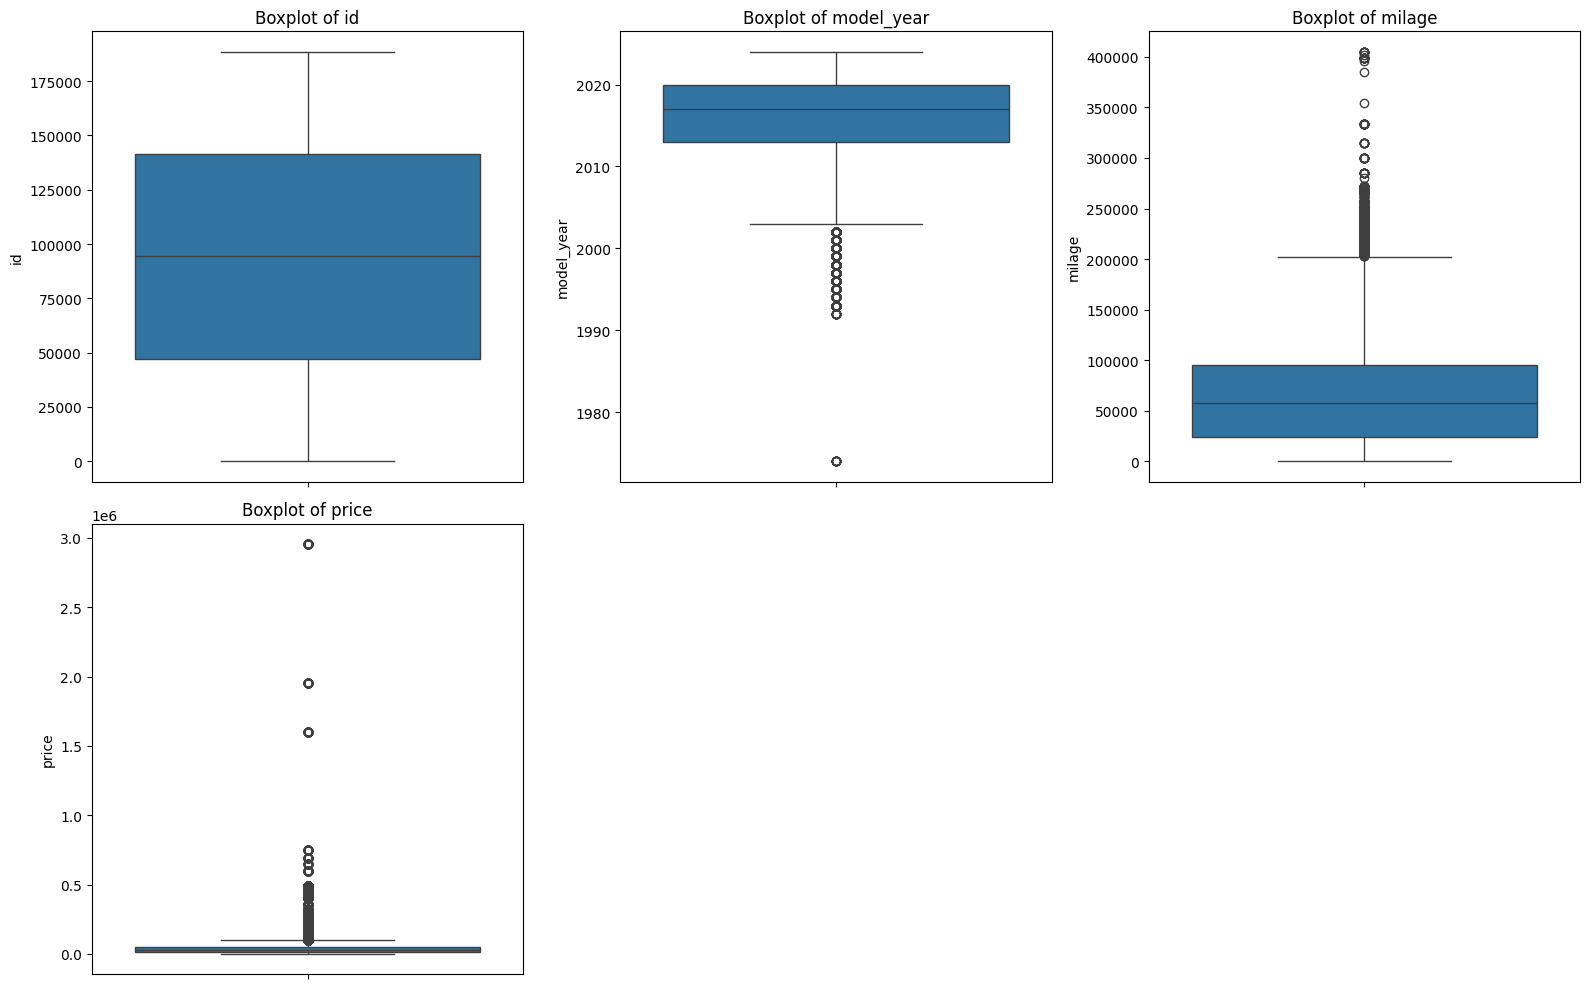

In [254]:
# Step 5: Identify outliers using boxplots for numerical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [255]:
# Step 6: Check for duplicates
duplicates = train_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


여기까지 범주형, 수치형 컬럼을 살펴보았는데 도움이 될 것같은 인사이트를 얻지는 못하였음

데이터의 수가 약 120,000개로 매우 많기 때문에 분포 자체를 살펴보는 것이 유의미한 모델 설계에 큰 도움이 되지 않을 수 있음

In [256]:
def value_counts(df, column):
    """
    Returns a beautified DataFrame with the value counts, including missing values, and their respective percentages.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column: str, name of the column to calculate value counts for.

    Returns:
    - A formatted pandas DataFrame showing the counts and percentages, including missing values.
    """
    value_counts = df[column].value_counts(normalize=True, dropna=False) * 100
    formatted_df = pd.DataFrame({
        'Count': df[column].value_counts(dropna=False),
        'Percentage (%)': value_counts.round(2)
    }).reset_index()
    
    formatted_df.columns = [column.capitalize(), 'Count', 'Percentage (%)']
    
    return formatted_df

In [257]:
brand_value_counts_train = value_counts(train_df, 'brand')
brand_value_counts_train

Brand  Count  Percentage (%)
0            Ford  23088           12.25
1   Mercedes-Benz  19172           10.17
2             BMW  17028            9.03
3       Chevrolet  16335            8.66
4            Audi  10887            5.77
5         Porsche  10612            5.63
6            Land   9525            5.05
7          Toyota   8850            4.69
8           Lexus   8643            4.58
9            Jeep   6474            3.43
10       Cadillac   4674            2.48
11            RAM   4249            2.25
12         Nissan   3930            2.08
13          Tesla   3738            1.98
14       INFINITI   3276            1.74
15            GMC   3215            1.71
16          Dodge   3133            1.66
17          Mazda   2719            1.44
18            Kia   2497            1.32
19        Lincoln   2423            1.29
20         Subaru   2381            1.26
21          Acura   2282            1.21
22          Honda   2101            1.11
23        Hyundai   2045            1.08
24     Volkswagen   1765            0.94
25         Jaguar   1319            0.70
26        Bentley   1155            0.61
27           MINI   1064            0.56
28        Genesis    969            0.51
29          Buick    940            0.50
30       Maserati    939            0.50
31    Lamborghini    809            0.43
32       Chrysler    727            0.39
33          Volvo    723            0.38
34           Alfa    682            0.36
35         Rivian    590            0.31
36    Rolls-Royce    561            0.30
37     Mitsubishi    551            0.29
38        Pontiac    538            0.29
39         Hummer    520            0.28
40        Ferrari    359            0.19
41        McLaren    243            0.13
42          Aston    238            0.13
43         Saturn    148            0.08
44          Scion    120            0.06
45          Lucid     69            0.04
46        Mercury     57            0.03
47          Lotus     52            0.03
48           FIAT     44            0.02
49           Saab     22            0.01
50          Karma     17            0.01
51         Suzuki      8            0.00
52       Plymouth      7            0.00
53        Bugatti      7            0.00
54       Polestar      7            0.00
55          smart      3            0.00
56        Maybach      3            0.00

In [258]:
brand_value_counts_test = value_counts(test_df, 'brand')
brand_value_counts_test


Brand  Count  Percentage (%)
0            Ford  15265           12.14
1   Mercedes-Benz  12875           10.24
2             BMW  11286            8.98
3       Chevrolet  10698            8.51
4            Audi   7289            5.80
5         Porsche   7153            5.69
6            Land   6348            5.05
7          Toyota   6084            4.84
8           Lexus   5729            4.56
9            Jeep   4412            3.51
10       Cadillac   3059            2.43
11            RAM   2753            2.19
12         Nissan   2674            2.13
13          Tesla   2387            1.90
14       INFINITI   2123            1.69
15            GMC   2094            1.67
16          Dodge   2071            1.65
17          Mazda   1770            1.41
18            Kia   1750            1.39
19        Lincoln   1593            1.27
20         Subaru   1591            1.27
21          Acura   1567            1.25
22          Honda   1436            1.14
23        Hyundai   1308            1.04
24     Volkswagen   1222            0.97
25         Jaguar    934            0.74
26        Bentley    789            0.63
27           MINI    697            0.55
28          Buick    651            0.52
29        Genesis    643            0.51
30       Maserati    619            0.49
31          Volvo    576            0.46
32    Lamborghini    547            0.44
33       Chrysler    514            0.41
34           Alfa    467            0.37
35         Rivian    390            0.31
36    Rolls-Royce    383            0.30
37     Mitsubishi    367            0.29
38         Hummer    342            0.27
39        Pontiac    341            0.27
40        Ferrari    251            0.20
41        McLaren    165            0.13
42          Aston    144            0.11
43         Saturn     97            0.08
44          Scion     62            0.05
45          Lucid     42            0.03
46        Mercury     39            0.03
47           FIAT     37            0.03
48          Lotus     19            0.02
49           Saab     11            0.01
50          Karma     10            0.01
51        Maybach      7            0.01
52       Plymouth      4            0.00
53        Bugatti      3            0.00
54         Suzuki      2            0.00

In [259]:
# Get the unique brands from both train and test DataFrames
train_brands = set(train_df['brand'].unique())
test_brands = set(test_df['brand'].unique())

# Check if all test brands are present in train brands
missing_brands = test_brands - train_brands

if not missing_brands:
    print("All brands in the test set are present in the train set.")
else:
    print(f"The following brands are in the test set but not in the train set: {missing_brands}")

All brands in the test set are present in the train set.


### Domain Knowledge 기반 EDA

Brand는 Price에 유의미한 영향을 미치는 변수임

Brand에 따라서 Price의 분포가 다르기 때문에 실제로 이러한 경향을 반영하기 위한 조치가 필요함

In [260]:
def add_price_stats(df, value_counts_df, category_column, price_column='price'):
    """
    Adds minimum, maximum, and average price statistics for each category to the value counts DataFrame,
    with styled output resembling a bar plot, without currency symbols.
    
    Parameters:
    - df: Original pandas DataFrame containing the data.
    - value_counts_df: DataFrame with value counts (output of value_counts function).
    - category_column: str, name of the column containing categories.
    - price_column: str, name of the column containing prices (default is 'price').
    
    Returns:
    - A styled DataFrame with added price statistics columns and bar plot-like representation.
    """
    # Find the correct case for the category column in both DataFrames
    df_category_col = next((col for col in df.columns if col.lower() == category_column.lower()), None)
    vc_category_col = next((col for col in value_counts_df.columns if col.lower() == category_column.lower()), None)
    
    if df_category_col is None or vc_category_col is None:
        raise ValueError(f"Column '{category_column}' not found in one or both DataFrames.")
    
    # Find the correct case for the price column
    price_col = next((col for col in df.columns if col.lower() == price_column.lower()), None)
    if price_col is None:
        raise ValueError(f"Price column '{price_column}' not found in the DataFrame.")
    
    # Calculate price statistics for each category
    price_stats = df.groupby(df_category_col)[price_col].agg(['min', 'max', 'mean']).reset_index()
    price_stats.columns = [df_category_col, 'min_price', 'max_price', 'avg_price']
    
    # Round the price values to 2 decimal places
    price_stats['min_price'] = price_stats['min_price'].round(2)
    price_stats['max_price'] = price_stats['max_price'].round(2)
    price_stats['avg_price'] = price_stats['avg_price'].round(2)
    
    # Merge the price statistics with the value counts DataFrame
    result_df = pd.merge(value_counts_df, price_stats, left_on=vc_category_col, right_on=df_category_col, how='left')
    
    # Reorder columns
    column_order = [vc_category_col, 'Count', 'Percentage (%)', 'min_price', 'max_price', 'avg_price']
    result_df = result_df[column_order]
    
    # Style the DataFrame
    styled_df = result_df.style.format({
        'Percentage (%)': '{:.2f}%',
        'min_price': '{:.2f}',  # Removed $ sign
        'max_price': '{:.2f}',  # Removed $ sign
        'avg_price': '{:.2f}'   # Removed $ sign
    })
    
    # Apply bar representation
    max_min_price = result_df['min_price'].max()
    max_max_price = result_df['max_price'].max()
    max_avg_price = result_df['avg_price'].max()
    
    styled_df.bar(subset=['min_price'], color='#5ad8a6', vmin=0, vmax=max_min_price)
    styled_df.bar(subset=['max_price'], color='#ff6e76', vmin=0, vmax=max_max_price)
    styled_df.bar(subset=['avg_price'], color='#fac858', vmin=0, vmax=max_avg_price)
    
    # Set table styles for night mode compatibility
    styled_df.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white')]},
        {'selector': 'td', 'props': [('background-color', '#34495e'), ('color', 'white')]},
    ])
    
    return styled_df


In [261]:
brand_value_counts_with_price_stats = add_price_stats(train_df, brand_value_counts_train, 'brand')
display(brand_value_counts_with_price_stats)


In [262]:
model_value_counts_train = value_counts(train_df, 'model')
model_value_counts_train.sample(10)

Model  Count  Percentage (%)
1214  AMG GLA 45 Base 4MATIC     29            0.02
60           A4 2.0T Premium    505            0.27
1678  XT6 Premium Luxury AWD     13            0.01
1703          SL-Class SL400     12            0.01
317          Enclave Leather    149            0.08
1494            718 Cayman S     19            0.01
1291            840 i xDrive     26            0.01
1591   F-250 XL SuperCab H/D     16            0.01
1622        XC60 T5 R-Design     15            0.01
163       Expedition Max XLT    254            0.13

In [263]:
model_value_counts_train = value_counts(test_df, 'model')
model_value_counts_train.sample(10)

Model  Count  Percentage (%)
335                        570S Spider     96            0.08
106         RX 350 F Sport Performance    225            0.18
1471                          Sonic LT     13            0.01
220                  Avalanche 1500 LS    135            0.11
1407                Q50 Hybrid Premium     14            0.01
27          C-Class C 300 4MATIC Sport    501            0.40
1573  Sierra 2500 SLE H/D Extended Cab     10            0.01
1353                 911 Carrera Turbo     15            0.01
222                 Model X Long Range    135            0.11
629                    Liberty Limited     49            0.04

In [264]:
# Get the unique models from both train and test DataFrames
train_models = set(train_df['model'].unique())
test_models = set(test_df['model'].unique())

# Check if all test brands are present in train models
missing_models = train_models - test_models

if not missing_brands:
    print("All models in the test set are present in the train set.")
else:
    print(f"The following models are in the test set but not in the train set: {missing_models}")

All models in the test set are present in the train set.


In [265]:
model_value_counts_with_price_stats = add_price_stats(train_df, model_value_counts_train, 'model')
display(model_value_counts_with_price_stats)


연도 역시 차량 가격에 유의미한 영향을 주는 변수 중 하나임

In [266]:
model_year_value_counts_train = value_counts(train_df, 'model_year')
model_year_value_counts_train.sort_values(by='Model_year', ascending=False, inplace=True)
model_year_value_counts_train


Model_year  Count  Percentage (%)
28        2024    162            0.09
8         2023   8769            4.65
3         2022  15749            8.35
0         2021  18198            9.65
2         2020  15848            8.41
4         2019  15409            8.17
1         2018  16414            8.71
6         2017  12794            6.79
5         2016  13696            7.26
7         2015  11389            6.04
9         2014   8415            4.46
10        2013   6796            3.60
12        2012   6095            3.23
11        2011   6265            3.32
15        2010   4235            2.25
18        2009   2716            1.44
13        2008   5156            2.73
14        2007   4876            2.59
17        2006   2814            1.49
16        2005   3129            1.66
19        2004   2570            1.36
20        2003   1906            1.01
22        2002   1282            0.68
21        2001   1534            0.81
23        2000    558            0.30
24        1999    554            0.29
25        1998    343            0.18
26        1997    312            0.17
27        1996    189            0.10
30        1995    102            0.05
31        1994     92            0.05
29        1993    140            0.07
32        1992     14            0.01
33        1974     12            0.01

In [267]:
model_year_value_counts_test = value_counts(test_df, 'model_year')
model_year_value_counts_test.sort_values(by='Model_year', ascending=False, inplace=True)
model_year_value_counts_test


Model_year  Count  Percentage (%)
28        2024    115            0.09
8         2023   5783            4.60
3         2022  10414            8.29
0         2021  12036            9.58
2         2020  10717            8.53
4         2019   9984            7.94
1         2018  11145            8.87
6         2017   8414            6.69
5         2016   9062            7.21
7         2015   7536            6.00
9         2014   5549            4.41
10        2013   4669            3.71
12        2012   4215            3.35
11        2011   4232            3.37
15        2010   2803            2.23
18        2009   1879            1.49
13        2008   3378            2.69
14        2007   3348            2.66
17        2006   1908            1.52
16        2005   2105            1.67
19        2004   1613            1.28
20        2003   1269            1.01
22        2002    880            0.70
21        2001   1049            0.83
24        2000    353            0.28
23        1999    398            0.32
25        1998    247            0.20
26        1997    214            0.17
27        1996    120            0.10
31        1995     69            0.05
30        1994     83            0.07
29        1993     88            0.07
32        1992      7            0.01
35        1988      1            0.00
34        1982      1            0.00
33        1974      6            0.00

In [268]:
model_year_value_counts_with_price_stats = add_price_stats(train_df, model_year_value_counts_train, 'model_year')
display(model_year_value_counts_with_price_stats)

### Fuel Type

In [269]:
fuel_type_value_counts_train = value_counts(train_df, 'fuel_type')
fuel_type_value_counts_train

Fuel_type   Count  Percentage (%)
0        Gasoline  165940           88.02
1          Hybrid    6832            3.62
2   E85 Flex Fuel    5406            2.87
3             NaN    5083            2.70
4          Diesel    3955            2.10
5               –     781            0.41
6  Plug-In Hybrid     521            0.28
7   not supported      15            0.01

In [270]:
fuel_type_value_counts_test = value_counts(test_df, 'fuel_type')
fuel_type_value_counts_test

Fuel_type   Count  Percentage (%)
0        Gasoline  110533           87.94
1          Hybrid    4676            3.72
2   E85 Flex Fuel    3523            2.80
3             NaN    3383            2.69
4          Diesel    2686            2.14
5               –     538            0.43
6  Plug-In Hybrid     337            0.27
7   not supported      14            0.01

In [271]:
train_df[train_df['fuel_type'] == 'E85 Flex Fuel'].sample(10)

id      brand                     model  model_year  milage  \
161014  161014       Audi      A4 2.0T Premium Plus        2019   19500   
66877    66877       Ford         Expedition EL XLT        2015   67500   
158355  158355  Chevrolet        Avalanche 1500 LTZ        2011  119000   
165000  165000       Audi  A4 2.0T Titanium Premium        2018   28690   
126331  126331       Audi      Q5 2.0T Premium Plus        2018   60345   
15303    15303       Ford  Expedition EL King Ranch        2012  163000   
180425  180425   Cadillac       Escalade ESV Luxury        2016  105667   
9068      9068   Cadillac     Escalade ESV Platinum        2006  123000   
47160    47160       Ford                 F-250 XLT        2015  123500   
139644  139644       Ford                 F-250 XLT        2019   63460   

            fuel_type                                             engine  \
161014  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
66877   E85 Flex Fuel  310.0HP 5.4L 8 Cylinder Engine Flex Fuel Capab...   
158355  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
165000  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
126331  E85 Flex Fuel           2.0L I4 16V GDI DOHC Turbo Flexible Fuel   
15303   E85 Flex Fuel  310.0HP 5.4L 8 Cylinder Engine Flex Fuel Capab...   
180425  E85 Flex Fuel  403.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...   
9068    E85 Flex Fuel  403.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...   
47160   E85 Flex Fuel  385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...   
139644  E85 Flex Fuel  385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...   

             transmission ext_col int_col  \
161014        8-Speed A/T     Red   Black   
66877         6-Speed A/T   White   Black   
158355                A/T   Black   Black   
165000        8-Speed A/T   White    Gray   
126331  8-Speed Automatic  Silver   Black   
15303         6-Speed A/T   White    Gray   
180425        6-Speed A/T    Gray    Gray   
9068                  A/T   White   Beige   
47160         6-Speed A/T  Silver    Gray   
139644        6-Speed A/T   White    Gray   

                                      accident clean_title  price  
161014  At least 1 accident or damage reported         Yes  30500  
66877                            None reported         Yes  32500  
158355                           None reported         Yes   9900  
165000                           None reported         Yes  30990  
126331  At least 1 accident or damage reported         Yes  22995  
15303                            None reported         Yes  18000  
180425                           None reported         Yes  16500  
9068    At least 1 accident or damage reported         Yes   7500  
47160                            None reported         Yes  34084  
139644                           None reported         Yes  46900

In [272]:
train_df[train_df['fuel_type'] == 'Plug-In Hybrid'].sample(10)

id    brand                               model  model_year  \
99518    99518      BMW                 X5 eDrive xDrive40e        2018   
4003      4003      BMW                   330e iPerformance        2018   
143733  143733     Ford                     C-Max Energi SE        2015   
88784    88784      Kia  Sorento Plug-In Hybrid SX Prestige        2023   
7984      7984     Ford                      Escape PHEV SE        2022   
59364    59364      BMW                   X5 PHEV xDrive45e        2023   
36724    36724      BMW                   330e iPerformance        2019   
116860  116860      BMW                   X5 PHEV xDrive45e        2023   
76027    76027     Ford              Fusion Energi Titanium        2023   
58755    58755  Porsche                  Cayenne E-Hybrid S        2016   

        milage       fuel_type  \
99518    51984  Plug-In Hybrid   
4003     52500  Plug-In Hybrid   
143733   86121  Plug-In Hybrid   
88784    10101  Plug-In Hybrid   
7984     27352  Plug-In Hybrid   
59364     9400  Plug-In Hybrid   
36724    70500  Plug-In Hybrid   
116860   14353  Plug-In Hybrid   
76027     9142  Plug-In Hybrid   
58755   101453  Plug-In Hybrid   

                                                   engine  \
99518   375.0HP 2.0L 4 Cylinder Engine Plug-In Electri...   
4003    247.0HP 2.0L 4 Cylinder Engine Plug-In Electri...   
143733  188.0HP 2.0L 4 Cylinder Engine Plug-In Electri...   
88784   261.0HP 1.6L 4 Cylinder Engine Plug-In Electri...   
7984    221.0HP 2.5L 4 Cylinder Engine Plug-In Electri...   
59364   389.0HP 3.0L Straight 6 Cylinder Engine Plug-I...   
36724   247.0HP 2.0L 4 Cylinder Engine Plug-In Electri...   
116860  389.0HP 3.0L Straight 6 Cylinder Engine Plug-I...   
76027   188.0HP 2.0L 4 Cylinder Engine Plug-In Electri...   
58755   416.0HP 3.0L V6 Cylinder Engine Plug-In Electr...   

                          transmission ext_col int_col  \
99518                      8-Speed A/T    Blue   Beige   
4003    Transmission w/Dual Shift Mode    Blue   Beige   
143733                CVT Transmission  Silver   Black   
88784                              A/T   White       –   
7984                  CVT Transmission   White   Black   
59364                      8-Speed A/T   White   Black   
36724   Transmission w/Dual Shift Mode    Blue   Black   
116860  Transmission w/Dual Shift Mode   Black   White   
76027                      8-Speed A/T    Pink   Beige   
58755                      8-Speed A/T   White   Beige   

                                      accident clean_title   price  
99518   At least 1 accident or damage reported         Yes   38880  
4003    At least 1 accident or damage reported         Yes   29950  
143733                           None reported         Yes   32850  
88784                            None reported         Yes   48990  
7984                             None reported         NaN   27785  
59364                            None reported         Yes   59750  
36724                            None reported         Yes   33000  
116860                           None reported         Yes   65000  
76027                            None reported         Yes  145000  
58755   At least 1 accident or damage reported         Yes   26000

In [273]:
train_df[train_df['fuel_type'] == '–'].sample(10)

id      brand                                 model  model_year  \
26461    26461        GMC         Sierra 1500 SLE1 Extended Cab        2016   
104698  104698      Dodge                        Challenger R/T        2021   
14068    14068   Maserati                             MC20 Base        2015   
41433    41433      Dodge              Challenger R/T Scat Pack        2008   
17202    17202       Ford              Bronco Big Bend Advanced        2017   
46732    46732  Chevrolet            1500 Cheyenne Extended Cab        1995   
75080    75080      Dodge                        Challenger R/T        2016   
185781  185781       Land  Rover Range Rover Evoque HSE Dynamic        2016   
21051    21051       Ford              Mustang EcoBoost Premium        2019   
87233    87233    Porsche                 911 Carrera Cabriolet        1996   

        milage fuel_type engine  transmission ext_col int_col  \
26461    50000         –      –           A/T   White   Black   
104698   38000         –      –           A/T   Black     Red   
14068   107500         –      –           A/T   Black   Black   
41433   152000         –      –   5-Speed M/T    Blue    Gray   
17202   115000         –      –  10-Speed A/T  Silver   Black   
46732    57000         –      –   4-Speed A/T     Red    Gray   
75080    38000         –      –   5-Speed A/T     Red    Gray   
185781   58500         –      –   9-Speed A/T   Black   Black   
21051   167000         –      –   6-Speed M/T   White   Black   
87233    49900         –      –           A/T  Silver   Black   

                                      accident clean_title  price  
26461   At least 1 accident or damage reported         Yes  25500  
104698                           None reported         Yes  61000  
14068                            None reported         Yes  16500  
41433                            None reported         Yes   9499  
17202                            None reported         Yes  22500  
46732                            None reported         Yes   5200  
75080   At least 1 accident or damage reported         Yes  15000  
185781                           None reported         Yes  10000  
21051   At least 1 accident or damage reported         Yes  33500  
87233   At least 1 accident or damage reported         Yes  97993

In [274]:
value_counts(train_df[train_df['fuel_type'] == '–'], 'engine')

Engine  Count  Percentage (%)
0                                                  –    772           98.85
1       140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel      1            0.13
2      582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel      1            0.13
3      310.0HP 6.8L 10 Cylinder Engine Gasoline Fuel      1            0.13
4  395.0HP 5.7L 8 Cylinder Engine Gasoline/Mild E...      1            0.13
5       188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel      1            0.13
6                                          3.5 Liter      1            0.13
7                              3.6L V6 24V MPFI DOHC      1            0.13
8  333.0HP 3.2L Straight 6 Cylinder Engine Gasoli...      1            0.13
9      284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel      1            0.13

In [275]:
train_df[train_df['fuel_type'] == 'not supported'].head(14)


id      brand                 model  model_year  milage  \
4823      4823  Chevrolet           Suburban LT        2011  109646   
18000    18000    Porsche            Camaro 2SS        2015   67000   
19182    19182     Nissan         Mirai Limited        2000  131000   
27199    27199     Subaru  Outback 2.5i Limited        2017  116000   
33030    33030     Nissan         Mirai Limited        2009  137333   
60717    60717  Chevrolet    Silverado 1500 RST        2020   19200   
74096    74096     Toyota         Mirai Limited        2021   79876   
86897    86897      Lexus        IS 350 F Sport        2022    9500   
94425    94425    Porsche      Cayenne Turbo GT        2018   52000   
127066  127066     Toyota         Mirai Limited        2016   58664   
128917  128917      Mazda       MX-5 Miata Base        1999  120000   
135865  135865      Lexus         Mirai Limited        2014  123331   
140206  140206      Lexus           RX 330 Base        2006  110000   
171120  171120     Hummer               H2 Base        2013  152068   

            fuel_type                                             engine  \
4823    not supported  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
18000   not supported       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
19182   not supported               182.0HP Electric Motor Hydrogen Fuel   
27199   not supported       175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel   
33030   not supported               182.0HP Electric Motor Hydrogen Fuel   
60717   not supported       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   
74096   not supported               182.0HP Electric Motor Hydrogen Fuel   
86897   not supported      311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
94425   not supported       550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel   
127066  not supported               151.0HP Electric Motor Hydrogen Fuel   
128917  not supported       140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
135865  not supported               182.0HP Electric Motor Hydrogen Fuel   
140206  not supported      230.0HP 3.3L V6 Cylinder Engine Gasoline Fuel   
171120  not supported       316.0HP 6.0L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
4823                       6-Speed A/T   Black   Beige   
18000   Transmission w/Dual Shift Mode   Black   Black   
19182                              A/T  Silver   Black   
27199                 CVT Transmission    Gray   Black   
33030                              A/T   White    Gray   
60717                     10-Speed A/T   White   Black   
74096                              A/T     Red   Black   
86897                              A/T    Gray   Black   
94425   Transmission w/Dual Shift Mode    Gray    Gray   
127066                CVT Transmission   Black   Black   
128917                     5-Speed M/T   Black   Beige   
135865                             A/T     Red    Gray   
140206                     5-Speed A/T   White   Beige   
171120                             A/T   Black   Black   

                                      accident clean_title  price  
4823                             None reported         Yes  18998  
18000                            None reported         Yes  11500  
19182                            None reported         Yes   5000  
27199   At least 1 accident or damage reported         Yes  27499  
33030   At least 1 accident or damage reported         Yes  12999  
60717   At least 1 accident or damage reported         Yes  58000  
74096                            None reported         Yes  15000  
86897                            None reported         Yes  60000  
94425   At least 1 accident or damage reported         Yes  35000  
127066  At least 1 accident or damage reported         Yes  22500  
128917  At least 1 accident or damage reported         Yes   4000  
135865  At least 1 accident or damage reported         Yes  11495  
140206  At least 1 accident or damage reported    

### Engline

In [276]:
import re

def parse_engine(df):
    """
    Parses the 'engine' column in the DataFrame to extract information such as horsepower, 
    engine displacement, cylinder count, engine configuration, and fuel type.
    Parameters:
    - df: pandas DataFrame containing the 'engine' column.
    Returns:
    - A new DataFrame with additional columns for each extracted feature, maintaining
      the original column names. The parsed fuel type column is named 'fuel_type_parsed'.
    """
    
    # Regular expressions for extracting features
    hp_pattern = re.compile(r'(\d{1,4}\.?0?)HP')
    displacement_pattern = re.compile(r'(\d+\.?\d*)\s*(L|Liter)')
    cylinder_pattern = re.compile(r'(\d+)\s*Cylinder|V(\d+)|I(\d+)')
    config_pattern = re.compile(r'(I\d+|V\d+|H\d+|Flat \d+|Straight \d+|Rotary)')
    fuel_pattern = re.compile(r'(Gasoline|Diesel|Flex Fuel|Hydrogen|Electric|Hybrid)')
    
    # Function to extract features from the engine column
    def extract_engine_features(engine):
        hp = hp_pattern.search(engine)
        displacement = displacement_pattern.search(engine)
        cylinders = cylinder_pattern.search(engine)
        config = config_pattern.search(engine)
        fuel = fuel_pattern.search(engine)
        
        # Extract cylinder count
        if cylinders:
            cylinder_count = cylinders.group(1) or cylinders.group(2) or cylinders.group(3)
        elif config:
            cylinder_count = re.search(r'\d+', config.group(0))
            cylinder_count = cylinder_count.group(0) if cylinder_count else None
        else:
            cylinder_count = None
        
        # Parse fuel type
        if fuel:
            fuel_type = fuel.group(0).lower()
            if 'flex fuel' in engine.lower():
                fuel_type = 'e85_flex_fuel'
            elif 'hydrogen' in engine.lower() and 'electric' in engine.lower():
                fuel_type = 'hydrogen_fuel_cell'
            elif re.search(r'hybrid|gasoline.*electric|electric.*gasoline', engine.lower()):
                fuel_type = 'hybrid'
            elif 'plug-in' in engine.lower():
                fuel_type = 'plug-in_hybrid'
            elif 'mild electric' in engine.lower():
                fuel_type = 'mild_hybrid'
        else:
            fuel_type = 'unknown'
        
        return {
            'horsepower': hp.group(1) if hp else None,
            'engine_displacement': displacement.group(1) if displacement else None,
            'cylinder_count': cylinder_count,
            'engine_configuration': config.group(0).lower() if config else None,
            'fuel_type_parsed': fuel_type
        }
    
    # Apply the extraction function to each row in the engine column
    engine_features = df['engine'].apply(extract_engine_features)
    
    # Convert the list of dictionaries to a DataFrame and join it with the original DataFrame
    engine_features_df = pd.DataFrame(engine_features.tolist())
    df = df.join(engine_features_df)
    
    return df

In [277]:
train_df = parse_engine(train_df)


In [278]:
display(train_df[['fuel_type', 'fuel_type_parsed', 'engine', 'horsepower', 'engine_displacement',  'cylinder_count', 'engine_configuration' ]].sample(10))

fuel_type fuel_type_parsed  \
122488  Gasoline         gasoline   
97011   Gasoline         gasoline   
140302  Gasoline         gasoline   
132806  Gasoline          unknown   
161870  Gasoline         gasoline   
185436  Gasoline         gasoline   
116449  Gasoline         gasoline   
111840  Gasoline          unknown   
173891    Hybrid           hybrid   
38241   Gasoline         gasoline   

                                                   engine horsepower  \
122488      291.0HP 3.8L V6 Cylinder Engine Gasoline Fuel      291.0   
97011   350.0HP 3.4L Flat 6 Cylinder Engine Gasoline Fuel      350.0   
140302       275.0HP 2.3L 4 Cylinder Engine Gasoline Fuel      275.0   
132806                                6.2L V8 16V GDI OHV       None   
161870      285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel      285.0   
185436       280.0HP 2.0L 4 Cylinder Engine Gasoline Fuel      280.0   
116449       526.0HP 5.2L 8 Cylinder Engine Gasoline Fuel      526.0   
111840                               3.0 Liter DOHC Turbo       None   
173891  335.0HP 3.0L V6 Cylinder Engine Gasoline/Mild ...      335.0   
38241        268.0HP 2.0L 4 Cylinder Engine Gasoline Fuel      268.0   

       engine_displacement cylinder_count engine_configuration  
122488                 3.8              6                   v6  
97011                  3.4              6               flat 6  
140302                 2.3              4                 None  
132806                 6.2              8                   v8  
161870                 3.6              6                   v6  
185436                 2.0              4                 None  
116449                 5.2              8                 None  
111840                 3.0           None                 None  
173891                 3.0              6                   v6  
38241                  2.0              4                 None

In [279]:
# Add more engine info
test_df = parse_engine(test_df)

In [280]:
display(test_df[['fuel_type', 'fuel_type_parsed', 'engine', 'horsepower', 'engine_displacement',  'cylinder_count', 'engine_configuration' ]].sample(10))

fuel_type fuel_type_parsed  \
49030       NaN         electric   
76271  Gasoline         gasoline   
48578  Gasoline          unknown   
1082     Hybrid          unknown   
2651   Gasoline         gasoline   
23678  Gasoline         gasoline   
99273  Gasoline          unknown   
59463  Gasoline         gasoline   
76367  Gasoline         gasoline   
28804  Gasoline         gasoline   

                                              engine horsepower  \
49030    271.0HP Electric Motor Electric Fuel System      271.0   
76271   248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel      248.0   
48578                           3.5L V6 24V PDI DOHC       None   
1082                                 3.0 Liter Turbo       None   
2651    420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel      420.0   
23678  333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel      333.0   
99273                     2.3L I4 16V GDI DOHC Turbo       None   
59463   241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel      241.0   
76367   503.0HP 4.0L 8 Cylinder Engine Gasoline Fuel      503.0   
28804   201.0HP 2.4L 4 Cylinder Engine Gasoline Fuel      201.0   

      engine_displacement cylinder_count engine_configuration  
49030                None           None                 None  
76271                 2.0              4                 None  
48578                 3.5              6                   v6  
1082                  3.0           None                 None  
2651                  6.2              8                 None  
23678                 3.0              6                   v6  
99273                 2.3              4                   i4  
59463                 2.0              4                 None  
76367                 4.0              8                 None  
28804                 2.4              4                 None

In [281]:
horsepower_value_counts_train = value_counts(train_df, 'horsepower')
horsepower_value_counts_train

Horsepower  Count  Percentage (%)
0         None  33259           17.64
1        300.0   5416            2.87
2        355.0   4433            2.35
3        420.0   4020            2.13
4        240.0   3634            1.93
..         ...    ...             ...
344      322.0      2            0.00
345       70.0      1            0.00
346      111.0      1            0.00
347       78.0      1            0.00
348      313.0      1            0.00

[349 rows x 3 columns]

In [282]:
def clean_horsepower(df):
    # Convert to numeric, coercing errors to NaN
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
    # Drop NaN values
    df = df.dropna(subset=['horsepower'])
    return df

# Clean the data
train_df = clean_horsepower(train_df)
test_df = clean_horsepower(test_df)

# Get the unique horsepower values from both train and test DataFrames
train_horsepower = set(train_df['horsepower'].unique())
test_horsepower = set(test_df['horsepower'].unique())

# Check if all test horsepower values are present in train horsepower values
missing_horsepower = test_horsepower - train_horsepower

if not missing_horsepower:
    print("All horsepower values in the test set are present in the train set.")
else:
     print(f"The following horsepower values are in the test set but not in the train set: {missing_horsepower}")

All horsepower values in the test set are present in the train set.


In [283]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(train_df, 
                 x='price', 
                 y='horsepower', 
                 title='Horsepower vs Price',
                 labels={'price': 'Price', 'horsepower': 'Horsepower'},
                 opacity=0.6)

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Horsepower',
    title_font_size=20,
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='$,.0f')  # Format x-axis ticks as currency
)

# Add hover data
fig.update_traces(
    hovertemplate="<br>".join([
        "Price: $%{x:,.2f}",
        "Horsepower: %{y}",
    ])
)

# Display the plot
fig.show()

In [284]:
engine_displacement_value_counts_train = value_counts(train_df, 'engine_displacement')
engine_displacement_value_counts_train

Engine_displacement  Count  Percentage (%)
0                  3.0  22408           14.43
1                  3.5  18007           11.60
2                  2.0  17267           11.12
3                  6.2   9983            6.43
4                  4.0   8619            5.55
..                 ...    ...             ...
56                 4.5     28            0.02
57                 8.4     18            0.01
58                 7.4     16            0.01
59                 1.0      1            0.00
60                 1.2      1            0.00

[61 rows x 3 columns]

In [285]:
engine_displacement_value_counts_with_price_stats = add_price_stats(train_df, engine_displacement_value_counts_train, 'engine_displacement')
display(engine_displacement_value_counts_with_price_stats)

In [286]:
cylinder_count_value_counts_train = value_counts(train_df, 'cylinder_count')
cylinder_count_value_counts_train


Cylinder_count  Count  Percentage (%)
0              6  66296           42.70
1              8  52444           33.78
2              4  29037           18.70
3           None   4767            3.07
4             12   1258            0.81
5             10    698            0.45
6              5    627            0.40
7              3    147            0.09

In [287]:
cylinder_count_value_counts_with_price_stats = add_price_stats(train_df, cylinder_count_value_counts_train, 'cylinder_count')
display(cylinder_count_value_counts_with_price_stats)

In [288]:
engine_configuration_value_counts_train = value_counts(train_df, 'engine_configuration')
engine_configuration_value_counts_train

Engine_configuration  Count  Percentage (%)
0                 None  88907           57.26
1                   v6  49312           31.76
2           straight 6  11640            7.50
3               flat 6   5344            3.44
4               rotary     71            0.05

In [289]:
engine_configuration_value_counts_with_price_stats = add_price_stats(train_df, engine_configuration_value_counts_train, 'engine_configuration')
display(engine_configuration_value_counts_with_price_stats)

In [290]:
fuel_type_parsed_value_counts_train = value_counts(train_df, 'fuel_type_parsed')
fuel_type_parsed_value_counts_train


Fuel_type_parsed   Count  Percentage (%)
0            gasoline  136056           87.62
1       e85_flex_fuel    5168            3.33
2              hybrid    5131            3.30
3            electric    4680            3.01
4              diesel    3686            2.37
5      plug-in_hybrid     537            0.35
6  hydrogen_fuel_cell      16            0.01

In [291]:
train_df[['fuel_type_parsed', 'fuel_type', 'engine']].sample(5)

fuel_type_parsed fuel_type  \
18527            hybrid    Hybrid   
115646         gasoline  Gasoline   
174093         gasoline  Gasoline   
88395          gasoline  Gasoline   
56183          gasoline  Gasoline   

                                                   engine  
18527   199.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...  
115646       490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel  
174093       268.0HP 2.0L 4 Cylinder Engine Gasoline Fuel  
88395        252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel  
56183       365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel

In [292]:
train_df['fuel_type_parsed'] = train_df['fuel_type_parsed'].replace({'None': None, 'unknown': None}).fillna(train_df['fuel_type']).fillna('unknown')

train_df[['fuel_type_parsed', 'fuel_type', 'engine']].sample(5)


fuel_type_parsed      fuel_type  \
107481    e85_flex_fuel  E85 Flex Fuel   
32343     e85_flex_fuel  E85 Flex Fuel   
136861         gasoline       Gasoline   
125948         gasoline       Gasoline   
121033         gasoline       Gasoline   

                                                   engine  
107481  355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...  
32343   180.0HP 2.4L 4 Cylinder Engine Flex Fuel Capab...  
136861       175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel  
125948      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel  
121033       710.0HP 4.0L 8 Cylinder Engine Gasoline Fuel

In [293]:
# Convert to lowercase and remove '_fuel' suffix
train_df['fuel_type_parsed'] = train_df['fuel_type_parsed'].astype(str).str.lower().str.removesuffix('_fuel')

In [294]:
fuel_type_parsed_value_counts_train = value_counts(train_df, 'fuel_type_parsed')
fuel_type_parsed_value_counts_train

Fuel_type_parsed   Count  Percentage (%)
0            gasoline  136056           87.62
1            e85_flex    5168            3.33
2              hybrid    5131            3.30
3            electric    4680            3.01
4              diesel    3686            2.37
5      plug-in_hybrid     537            0.35
6  hydrogen_fuel_cell      16            0.01

In [295]:
fuel_type_value_counts_train

Fuel_type   Count  Percentage (%)
0        Gasoline  165940           88.02
1          Hybrid    6832            3.62
2   E85 Flex Fuel    5406            2.87
3             NaN    5083            2.70
4          Diesel    3955            2.10
5               –     781            0.41
6  Plug-In Hybrid     521            0.28
7   not supported      15            0.01

In [296]:
test_df['fuel_type_parsed'] = test_df['fuel_type_parsed'].replace({'None': None, 'unknown': None}).fillna(test_df['fuel_type']).fillna('unknown')
test_df['fuel_type_parsed'] = test_df['fuel_type_parsed'].astype(str).str.lower().str.removesuffix('_fuel')
fuel_type_parsed_value_counts_test = value_counts(test_df, 'fuel_type_parsed')
fuel_type_parsed_value_counts_test


Fuel_type_parsed  Count  Percentage (%)
0            gasoline  90751           87.67
1              hybrid   3465            3.35
2            e85_flex   3383            3.27
3            electric   3049            2.95
4              diesel   2496            2.41
5      plug-in_hybrid    356            0.34
6  hydrogen_fuel_cell      9            0.01

In [297]:
transmission_value_counts_train = value_counts(train_df, 'transmission')
transmission_value_counts_train


Transmission  Count  Percentage (%)
0                                 A/T  49163           31.66
1                         8-Speed A/T  20527           13.22
2      Transmission w/Dual Shift Mode  19155           12.34
3                         6-Speed A/T  17975           11.58
4                         6-Speed M/T  11860            7.64
5                         7-Speed A/T  11098            7.15
6                        10-Speed A/T   7998            5.15
7                         9-Speed A/T   3842            2.47
8                         5-Speed A/T   3172            2.04
9                         4-Speed A/T   2451            1.58
10                        5-Speed M/T   2321            1.49
11                   CVT Transmission   1951            1.26
12                        1-Speed A/T   1759            1.13
13                                M/T   1164            0.75
14                        7-Speed M/T    353            0.23
15      Transmission Overdrive Switch    154            0.10
16                          Automatic    113            0.07
17                        2-Speed A/T     68            0.04
18                  8-Speed Automatic     39            0.03
19                 10-Speed Automatic     17            0.01
20                                  F     13            0.01
21                                  2     13            0.01
22                  6-Speed Automatic     13            0.01
23                      Automatic CVT      8            0.01
24                                  –      8            0.01
25                            6-Speed      7            0.00
26  7-Speed Automatic with Auto-Shift      6            0.00
27                            7-Speed      6            0.00
28                  9-Speed Automatic      3            0.00
29                  1-Speed Automatic      2            0.00
30                        8-SPEED A/T      2            0.00
31                  7-Speed Automatic      2            0.00
32                              CVT-F      2            0.00
33                  5-Speed Automatic      1            0.00
34                     7-Speed Manual      1            0.00
35  6-Speed Automatic with Auto-Shift      1            0.00
36                         6 Speed Mt      1            0.00
37                             Manual      1            0.00
38     SCHEDULED FOR OR IN PRODUCTION      1            0.00
39              7-Speed DCT Automatic      1            0.00
40                     6-Speed Manual      1            0.00
41                  4-Speed Automatic      1            0.00

Common Car Transmission Types¶

Manual Transmission (MT): Requires manual gear shifting using a clutch and gear lever.

Automatic Transmission (AT): Automatically shifts gears without the need for a clutch pedal.

Continuously Variable Transmission (CVT): Uses pulleys and a belt for seamless gear shifts without traditional gear steps.

Dual-Clutch Transmission (DCT): Uses two clutches for faster and smoother automatic shifts, often found in performance cars.

Semi-Automatic Transmission (SAT): Combines manual and automatic modes, allowing the driver to choose between the two.

Tiptronic Transmission: An automatic transmission that also allows manual gear shifting.

Automated Manual Transmission (AMT): Similar to manual transmission but with automated clutch and gear shift controls.

In [298]:
transmission_value_counts_with_price_stats = add_price_stats(train_df, transmission_value_counts_train, 'transmission')
display(transmission_value_counts_with_price_stats)

In [299]:
# Get the unique transmission types from both train and test DataFrames
train_transmissions = set(train_df['transmission'].unique())
test_transmissions = set(test_df['transmission'].unique())

# Check if all test transmissions are present in train transmissions
missing_transmissions = test_transmissions - train_transmissions

if not missing_transmissions:
    print("All transmissions in the test set are present in the train set.")
else:
    print(f"The following transmissions are in the test set but not in the train set: {missing_transmissions}")

The following transmissions are in the test set but not in the train set: {'6 Speed At/Mt', 'Variable', '6-Speed Electronically Controlled Automatic with O', '8-SPEED AT', '8-Speed Automatic with Auto-Shift'}


In [300]:
# Get the union of both train and test transmission sets (unique values across both)
all_transmissions = train_transmissions.union(test_transmissions)

# Print each transmission type on a new line
print("Unique transmissions in both train and test sets:")
all_transmissions

Unique transmissions in both train and test sets:


{'1-Speed A/T',
 '1-Speed Automatic',
 '10-Speed A/T',
 '10-Speed Automatic',
 '2',
 '2-Speed A/T',
 '4-Speed A/T',
 '4-Speed Automatic',
 '5-Speed A/T',
 '5-Speed Automatic',
 '5-Speed M/T',
 '6 Speed At/Mt',
 '6 Speed Mt',
 '6-Speed',
 '6-Speed A/T',
 '6-Speed Automatic',
 '6-Speed Automatic with Auto-Shift',
 '6-Speed Electronically Controlled Automatic with O',
 '6-Speed M/T',
 '6-Speed Manual',
 '7-Speed',
 '7-Speed A/T',
 '7-Speed Automatic',
 '7-Speed Automatic with Auto-Shift',
 '7-Speed DCT Automatic',
 '7-Speed M/T',
 '7-Speed Manual',
 '8-SPEED A/T',
 '8-SPEED AT',
 '8-Speed A/T',
 '8-Speed Automatic',
 '8-Speed Automatic with Auto-Shift',
 '9-Speed A/T',
 '9-Speed Automatic',
 'A/T',
 'Automatic',
 'Automatic CVT',
 'CVT Transmission',
 'CVT-F',
 'F',
 'M/T',
 'Manual',
 'SCHEDULED FOR OR IN PRODUCTION',
 'Transmission Overdrive Switch',
 'Transmission w/Dual Shift Mode',
 'Variable',
 '–'}

In [301]:
transmission_mapping = {
    "10-Speed A/T": "Automatic",
    "SCHEDULED FOR OR IN PRODUCTION": "Other",
    "Manual": "Manual",
    "6-Speed": "Automatic",
    "8-Speed A/T": "Automatic",
    "Variable": "CVT",
    "7-Speed Automatic": "Automatic",
    "Transmission Overdrive Switch": "Semi-Automatic",
    "Automatic": "Automatic",
    "8-SPEED AT": "Automatic",
    "–": "Other",
    "2-Speed A/T": "Automatic",
    "2": "Other",
    "M/T": "Manual",
    "6-Speed Automatic": "Automatic",
    "7-Speed": "Automatic",
    "5-Speed M/T": "Manual",
    "6-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "4-Speed Automatic": "Automatic",
    "7-Speed Manual": "Manual",
    "7-Speed M/T": "Manual",
    "9-Speed Automatic": "Automatic",
    "6 Speed At/Mt": "Automatic",
    "CVT-F": "CVT",
    "1-Speed A/T": "Automatic",
    "6-Speed Manual": "Manual",
    "7-Speed A/T": "Automatic",
    "8-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "10-Speed Automatic": "Automatic",
    "1-Speed Automatic": "Automatic",
    "9-Speed A/T": "Automatic",
    "Transmission w/Dual Shift Mode": "Semi-Automatic",
    "5-Speed Automatic": "Automatic",
    "8-Speed Automatic": "Automatic",
    "7-Speed DCT Automatic": "Automatic",
    "A/T": "Automatic",
    "Automatic CVT": "CVT",
    "F": "Other",
    "4-Speed A/T": "Automatic",
    "7-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "6-Speed A/T": "Automatic",
    "8-SPEED A/T": "Automatic",
    "6-Speed Electronically Controlled Automatic with O": "Automatic",
    "5-Speed A/T": "Automatic",
    "6 Speed Mt": "Manual",
    "6-Speed M/T": "Manual"
}

In [302]:
transmission_mapping = {
    "10-Speed A/T": "Automatic",
    "SCHEDULED FOR OR IN PRODUCTION": "Other",
    "Manual": "Manual",
    "6-Speed": "Automatic",
    "8-Speed A/T": "Automatic",
    "Variable": "CVT",
    "7-Speed Automatic": "Automatic",
    "Transmission Overdrive Switch": "Semi-Automatic",
    "Automatic": "Automatic",
    "8-SPEED AT": "Automatic",
    "–": "Other",
    "2-Speed A/T": "Automatic",
    "2": "Other",
    "M/T": "Manual",
    "6-Speed Automatic": "Automatic",
    "7-Speed": "Automatic",
    "5-Speed M/T": "Manual",
    "6-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "4-Speed Automatic": "Automatic",
    "7-Speed Manual": "Manual",
    "7-Speed M/T": "Manual",
    "9-Speed Automatic": "Automatic",
    "6 Speed At/Mt": "Automatic",
    "CVT-F": "CVT",
    "1-Speed A/T": "Automatic",
    "6-Speed Manual": "Manual",
    "7-Speed A/T": "Automatic",
    "8-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "10-Speed Automatic": "Automatic",
    "1-Speed Automatic": "Automatic",
    "9-Speed A/T": "Automatic",
    "Transmission w/Dual Shift Mode": "Semi-Automatic",
    "5-Speed Automatic": "Automatic",
    "8-Speed Automatic": "Automatic",
    "7-Speed DCT Automatic": "Automatic",
    "A/T": "Automatic",
    "Automatic CVT": "CVT",
    "F": "Other",
    "4-Speed A/T": "Automatic",
    "7-Speed Automatic with Auto-Shift": "Semi-Automatic",
    "6-Speed A/T": "Automatic",
    "8-SPEED A/T": "Automatic",
    "6-Speed Electronically Controlled Automatic with O": "Automatic",
    "5-Speed A/T": "Automatic",
    "6 Speed Mt": "Manual",
    "6-Speed M/T": "Manual"
}


train_df['transmission_type'] = train_df['transmission'].map(transmission_mapping)

In [303]:
transmission_type_value_counts_train = value_counts(train_df, 'transmission_type')
transmission_type_value_counts_train

Transmission_type   Count  Percentage (%)
0         Automatic  118260           76.16
1    Semi-Automatic   19316           12.44
2            Manual   15702           10.11
3               NaN    1951            1.26
4             Other      35            0.02
5               CVT      10            0.01

In [304]:
transmission_type_value_counts_with_price_stats = add_price_stats(train_df, transmission_type_value_counts_train, 'transmission_type')
display(transmission_type_value_counts_with_price_stats)

In [305]:
test_df['transmission_type'] = test_df['transmission'].map(transmission_mapping)

In [306]:
ext_col_value_counts_train = value_counts(train_df, 'ext_col')
ext_col_value_counts_train

Ext_col  Count  Percentage (%)
0                            Black  43634           28.10
1                            White  40696           26.21
2                             Gray  23396           15.07
3                           Silver  15932           10.26
4                             Blue  13749            8.85
..                             ...    ...             ...
85         Iridium Silver Metallic      1            0.00
86            Satin Steel Metallic      1            0.00
87                  Oryx White Prl      1            0.00
88  Snowflake White Pearl Metallic      1            0.00
89                           Chalk      1            0.00

[90 rows x 3 columns]

In [307]:
int_col_value_counts_train = value_counts(train_df, 'int_col')
int_col_value_counts_train

Int_col  Count  Percentage (%)
0                  Black  90285           58.15
1                  Beige  23995           15.45
2                   Gray  20068           12.92
3                  Brown   5727            3.69
4                    Red   4642            2.99
..                   ...    ...             ...
76                 Cloud      1            0.00
77  Gray w/Blue Bolsters      1            0.00
78                   Ash      1            0.00
79          Aragon Brown      1            0.00
80        Black / Saddle      1            0.00

[81 rows x 3 columns]

In [308]:
# Convert 'ext_col' and 'int_col' columns to lowercase in train_df
train_df['ext_col'] = train_df['ext_col'].str.lower()
train_df['int_col'] = train_df['int_col'].str.lower()

# Convert 'ext_col' and 'int_col' columns to lowercase in test_df
test_df['ext_col'] = test_df['ext_col'].str.lower()
test_df['int_col'] = test_df['int_col'].str.lower()

In [309]:
ext_col_value_counts_train = value_counts(train_df, 'ext_col')
int_col_value_counts_train = value_counts(train_df, 'int_col')

In [310]:
ext_col_value_counts_with_price_stats = add_price_stats(train_df, ext_col_value_counts_train, 'ext_col')
display(ext_col_value_counts_with_price_stats)

int_col_value_counts_with_price_stats = add_price_stats(train_df, int_col_value_counts_train, 'int_col')
display(int_col_value_counts_with_price_stats)

In [311]:
# Convert 'ext_col' column to lowercase in both train_df and test_df
train_df['ext_col'] = train_df['ext_col'].str.lower()
test_df['ext_col'] = test_df['ext_col'].str.lower()

# Get the unique ext_col values from both train and test DataFrames
train_ext_cols = set(train_df['ext_col'].unique())
test_ext_cols = set(test_df['ext_col'].unique())

# Check if all test ext_col values are present in train ext_col values
missing_ext_cols = test_ext_cols - train_ext_cols

if not missing_ext_cols:
    print("All ext_col values in the test set are present in the train set.")
else:
    print(f"The following ext_col values are in the test set but not in the train set: {missing_ext_cols}")

The following ext_col values are in the test set but not in the train set: {'verde', 'hyper red', 'tango red metallic', 'black cherry', 'tungsten metallic', 'dark matter metallic', 'portofino blue metallic', 'lunar rock', 'typhoon gray metallic', 'ultra white', 'black forest green', 'northsky blue metallic', 'frozen white', 'red multi', 'dark moss', 'granite', 'rosso', 'silver mist', 'stormy sea', 'bianco monocerus', 'designo diamond white bright', 'caviar', 'designo diamond white', 'pearl white', 'magnetite black metallic', 'python green', 'china blue', 'santorini black metallic', 'yulong white', 'eminent white pearl', 'jungle green'}


In [312]:
# Convert 'int_col' column to lowercase in both train_df and test_df
train_df['int_col'] = train_df['int_col'].str.lower()
test_df['int_col'] = test_df['int_col'].str.lower()

# Get the unique int_col values from both train and test DataFrames
train_int_cols = set(train_df['int_col'].unique())
test_int_cols = set(test_df['int_col'].unique())

# Check if all test int_col values are present in train int_col values
missing_int_cols = test_int_cols - train_int_cols

if not missing_int_cols:
    print("All int_col values in the test set are present in the train set.")
else:
    print(f"The following int_col values are in the test set but not in the train set: {missing_int_cols}")

The following int_col values are in the test set but not in the train set: {'light gray', 'tan/ebony', 'nougat brown', 'ceramic', 'medium light camel', 'oyster w/contrast', 'black/gun metal', 'giallo taurus / nero ade', 'rock gray', 'espresso', 'saddle brown'}


In [313]:
accident_value_counts_train = value_counts(train_df, 'accident')
accident_value_counts_train

Accident   Count  Percentage (%)
0                           None reported  115242           74.22
1  At least 1 accident or damage reported   38411           24.74
2                                     NaN    1621            1.04

In [314]:
# Define the mapping for the accident column
accident_mapping = {
    "None reported": 0,
    "At least 1 accident or damage reported": 1
}

# Apply the mapping to both train_df and test_df, then fill NaN values with -1
train_df['accident'] = train_df['accident'].map(accident_mapping).fillna(-1)
test_df['accident'] = test_df['accident'].map(accident_mapping).fillna(-1)

In [315]:
accident_value_counts_train = value_counts(train_df, 'accident')
accident_value_counts_train

Accident   Count  Percentage (%)
0       0.0  115242           74.22
1       1.0   38411           24.74
2      -1.0    1621            1.04

In [316]:
accident_value_counts_train_price_stats = add_price_stats(train_df, accident_value_counts_train, 'accident')
display(accident_value_counts_train_price_stats)

In [317]:
clean_title_value_counts_train = value_counts(train_df, 'clean_title')
clean_title_value_counts_train

Clean_title   Count  Percentage (%)
0         Yes  153335           98.75
1         NaN    1939            1.25

In [ ]:
clean_title_value_counts_train.info()

In [ ]:
clean_title_value_counts_train_price_stats = add_price_stats(train_df, clean_title_value_counts_train, 'clean_title')
display(clean_title_value_counts_train_price_stats)

In [ ]:
train_df[train_df['clean_title'] != 'Yes'].sample(10)

In [176]:
# # Drop the 'clean_title' column from both train_df and test_df
# train_df = train_df.drop(columns=['clean_title'])
# test_df = test_df.drop(columns=['clean_title'])